# **Milk Quality Prediction using Classification Models**


__This project's main objective is to classify milk grades using their properties - Temperature, Taste, pH, turbidity, odor, and fat content.__

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
datapath = "data/milknew.csv"
milk_df = pd.read_csv(datapath)

In [3]:
milk_df.head()


,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
milk_df.describe().T

,count,mean,std,min,25%,50%,75%,max
pH,1059.0,6.630123,1.399679,3.0,6.5,6.7,6.8,9.5
Temprature,1059.0,44.226629,10.098364,34.0,38.0,41.0,45.0,90.0
Taste,1059.0,0.546742,0.498046,0.0,0.0,1.0,1.0,1.0
Odor,1059.0,0.432483,0.495655,0.0,0.0,0.0,1.0,1.0
Fat,1059.0,0.671388,0.469930,0.0,0.0,1.0,1.0,1.0
Turbidity,1059.0,0.491029,0.500156,0.0,0.0,0.0,1.0,1.0
Colour,1059.0,251.840415,4.307424,240.0,250.0,255.0,255.0,255.0


We would be using the pH level, Temperature, Taste, Odor,Fat, Turbdidity and Color of the Milk using  classification models to predict the grade of the milk

In [5]:
milk_df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [6]:
milk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


## Logistic Regression

We would be using logistic regression to predict the grade of the milk using its properties

In [7]:
milk_df.dtypes.value_counts()

int64      6
float64    1
object     1
dtype: int64

In [8]:
milk_df.Grade.value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
milk_df['Grade'] = le.fit_transform(milk_df.Grade)

milk_df['Grade'].sample(5)


493    1
732    1
321    0
868    1
68     1
Name: Grade, dtype: int32

In [10]:
feature_cols = milk_df.columns[:-1]
milk_df.corr()['Grade'].sort_values()


Fat          -0.501070
Odor         -0.454609
Turbidity    -0.428017
Colour       -0.212994
Taste        -0.197629
Temprature   -0.094232
pH           -0.012518
Grade         1.000000
Name: Grade, dtype: float64

The data is to be split into train and test data sets. This can be done using any method, but Scikit-learn's `StratifiedShuffleSplit` is being used to maintain the same ratio of predictor classes.

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(milk_df[feature_cols], milk_df.Grade))

X_train = milk_df.loc[train_idx, feature_cols]
y_train = milk_df.loc[train_idx, 'Grade']

X_test  = milk_df.loc[test_idx, feature_cols]
y_test  = milk_df.loc[test_idx, 'Grade']

In [12]:
y_train.value_counts(normalize=True)

1    0.404858
2    0.353576
0    0.241565
Name: Grade, dtype: float64

Fitting the logistic regression model

In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [14]:
# L2 penalty to shrink coefficients without removing any features from the model
penalty= 'l2'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use lbfgs for L2 penalty and multinomial classes
solver = 'lbfgs'
# Max iteration = 1000
max_iter = 100000


l2_model = LogisticRegression(penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iter)

In [15]:
l2_model.fit(X_train, y_train)

LogisticRegression(max_iter=100000, multi_class='multinomial')

In [16]:
l2_preds = l2_model.predict(X_test)

Evaluating our model and returning `accuracy`, `recall`, `precision` and `f1score`

In [17]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [18]:
evaluate_metrics(y_test,l2_preds)

{'accuracy': 0.8238993710691824,
 'recall': array([0.80519481, 0.82945736, 0.83035714]),
 'precision': array([0.65957447, 0.8699187 , 0.92079208]),
 'f1score': array([0.7251462 , 0.84920635, 0.87323944])}

Next, let's try defining another logistic regression model with l1 penality this time, to see if our classification performance would be improved.

In [19]:
# L1 penalty to shrink coefficients without removing any features from the model
penalty= 'l1'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use saga for L1 penalty and multinomial classes
solver = 'saga'
# Max iteration = 1000
max_iter = 100000

In [20]:
# Define a logistic regression model with above arguments
l1_model = LogisticRegression( penalty=penalty, multi_class=multi_class, solver=solver, max_iter = max_iter)

In [21]:
l1_model.fit(X_train, y_train)

LogisticRegression(max_iter=100000, multi_class='multinomial', penalty='l1',
                   solver='saga')

In [22]:
l1_preds = l1_model.predict(X_test)

In [23]:
evaluate_metrics(y_test, l1_preds)

{'accuracy': 0.6949685534591195,
 'recall': array([0.61038961, 0.66666667, 0.78571429]),
 'precision': array([0.64383562, 0.76785714, 0.66165414]),
 'f1score': array([0.62666667, 0.71369295, 0.71836735])}

The logistic regression with L2 penalty has much better performance than L1.

In [24]:
l1_model.coef_

array([[ 2.59582374e-02, -6.25986452e-02, -3.20499413e-03,
         1.36722496e+00,  2.11862637e+00,  1.92342187e-01,
         1.02568101e-07],
       [-3.55904185e-01,  2.12991615e-01,  9.55545683e-01,
        -2.02576534e-01, -5.34048859e-01,  1.34963193e+00,
        -2.73016290e-02],
       [ 2.00109136e-01, -2.05559371e-02, -8.94157483e-01,
        -1.05164065e+00, -1.49931554e+00, -1.67181137e+00,
         8.67395427e-03]])

In [25]:
def get_feature_coefs(regression_model, label_index, columns):
    coef_dict = {}
    for coef, feat in zip(regression_model.coef_[label_index, :], columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

In [26]:
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

In [27]:
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

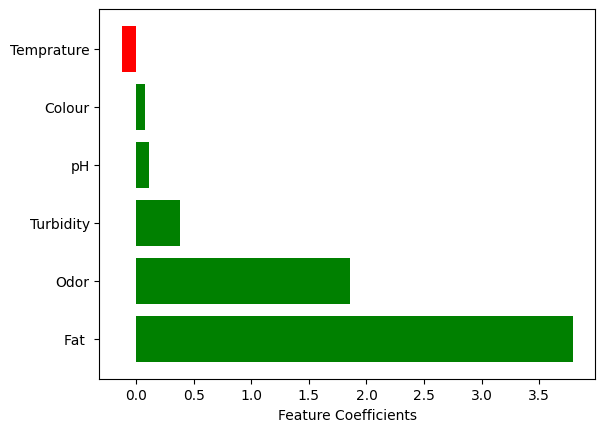

In [28]:
coef_dict = get_feature_coefs(l2_model, 0, feature_cols)
visualize_coefs(coef_dict)

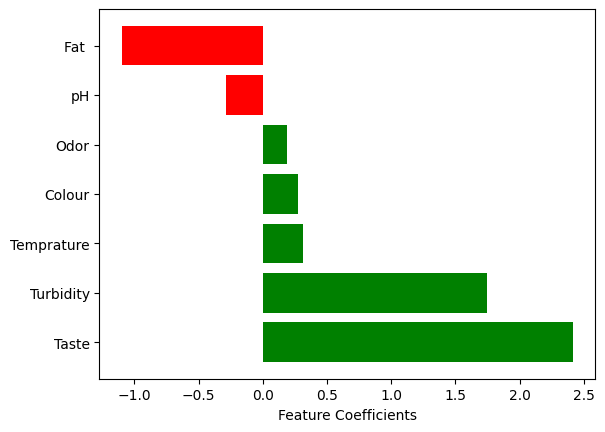

In [29]:
coef_dict = get_feature_coefs(l2_model, 1, feature_cols)
visualize_coefs(coef_dict)

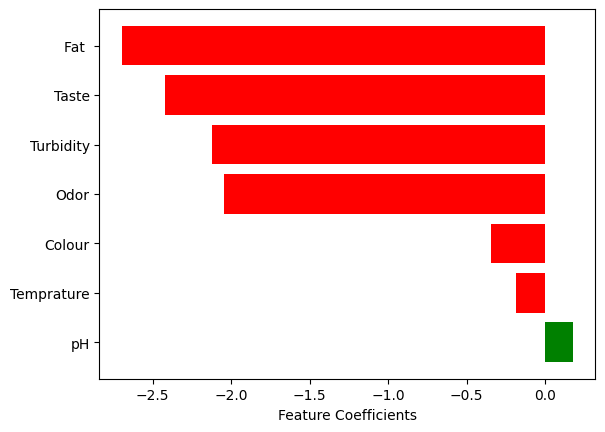

In [30]:
coef_dict = get_feature_coefs(l2_model, 2, feature_cols)
visualize_coefs(coef_dict)

In [31]:
milk_df.Grade.value_counts()

1    429
2    374
0    256
Name: Grade, dtype: int64

In Summary, according to the chart above, milk is categorized as a low grade if it contains high amounts of fats and if it has an odor. In contrast, the milk is classified as a high grade if it does not contain a high amount of fats and if it is turbid.

## KNN


In [92]:
knn_model = KNeighborsClassifier(n_neighbors=5)


In [93]:
knn_model.fit(X_train, y_train.values.ravel())


KNeighborsClassifier()

In [94]:
knn_preds = knn_model.predict(X_test)

In [95]:
def evaluate_metrics_knn(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [98]:
evaluate_metrics_knn(y_test, knn_preds)


{'accuracy': 0.9937106918238994,
 'recall': array([0.98701299, 0.99224806, 1.        ]),
 'precision': array([1.        , 1.        , 0.98245614]),
 'f1score': array([0.99346405, 0.99610895, 0.99115044])}

K Nearest Neighbors has a higher accuracy and `f1score` than logistic regression

## Decision Tree

In [99]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [100]:
model = DecisionTreeClassifier(random_state=123)

In [101]:
model.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(random_state=123)

In [103]:
preds_dt = model.predict(X_test)

In [104]:
evaluate_metrics(y_test, preds_dt)

{'accuracy': 0.9968553459119497,
 'recall': array([0.98701299, 1.        , 1.        ]),
 'precision': array([1.        , 0.99230769, 1.        ]),
 'f1score': array([0.99346405, 0.996139  , 1.        ])}

The `f1score` of the decision tree and KNN model are the same but the `accuracy` of the decision tree model is insignificantly higher than the KNN model.

In [105]:
def plot_decision_tree(model, feature_names):
    plt.subplots(figsize=(25, 20)) 
    tree.plot_tree(model, 
                       feature_names=feature_names,  
                       filled=True)
    plt.show()

In [106]:
feature_names = milk_df.iloc[:, :-1].columns.values

__Here is the visual representation of the decision tree model.__

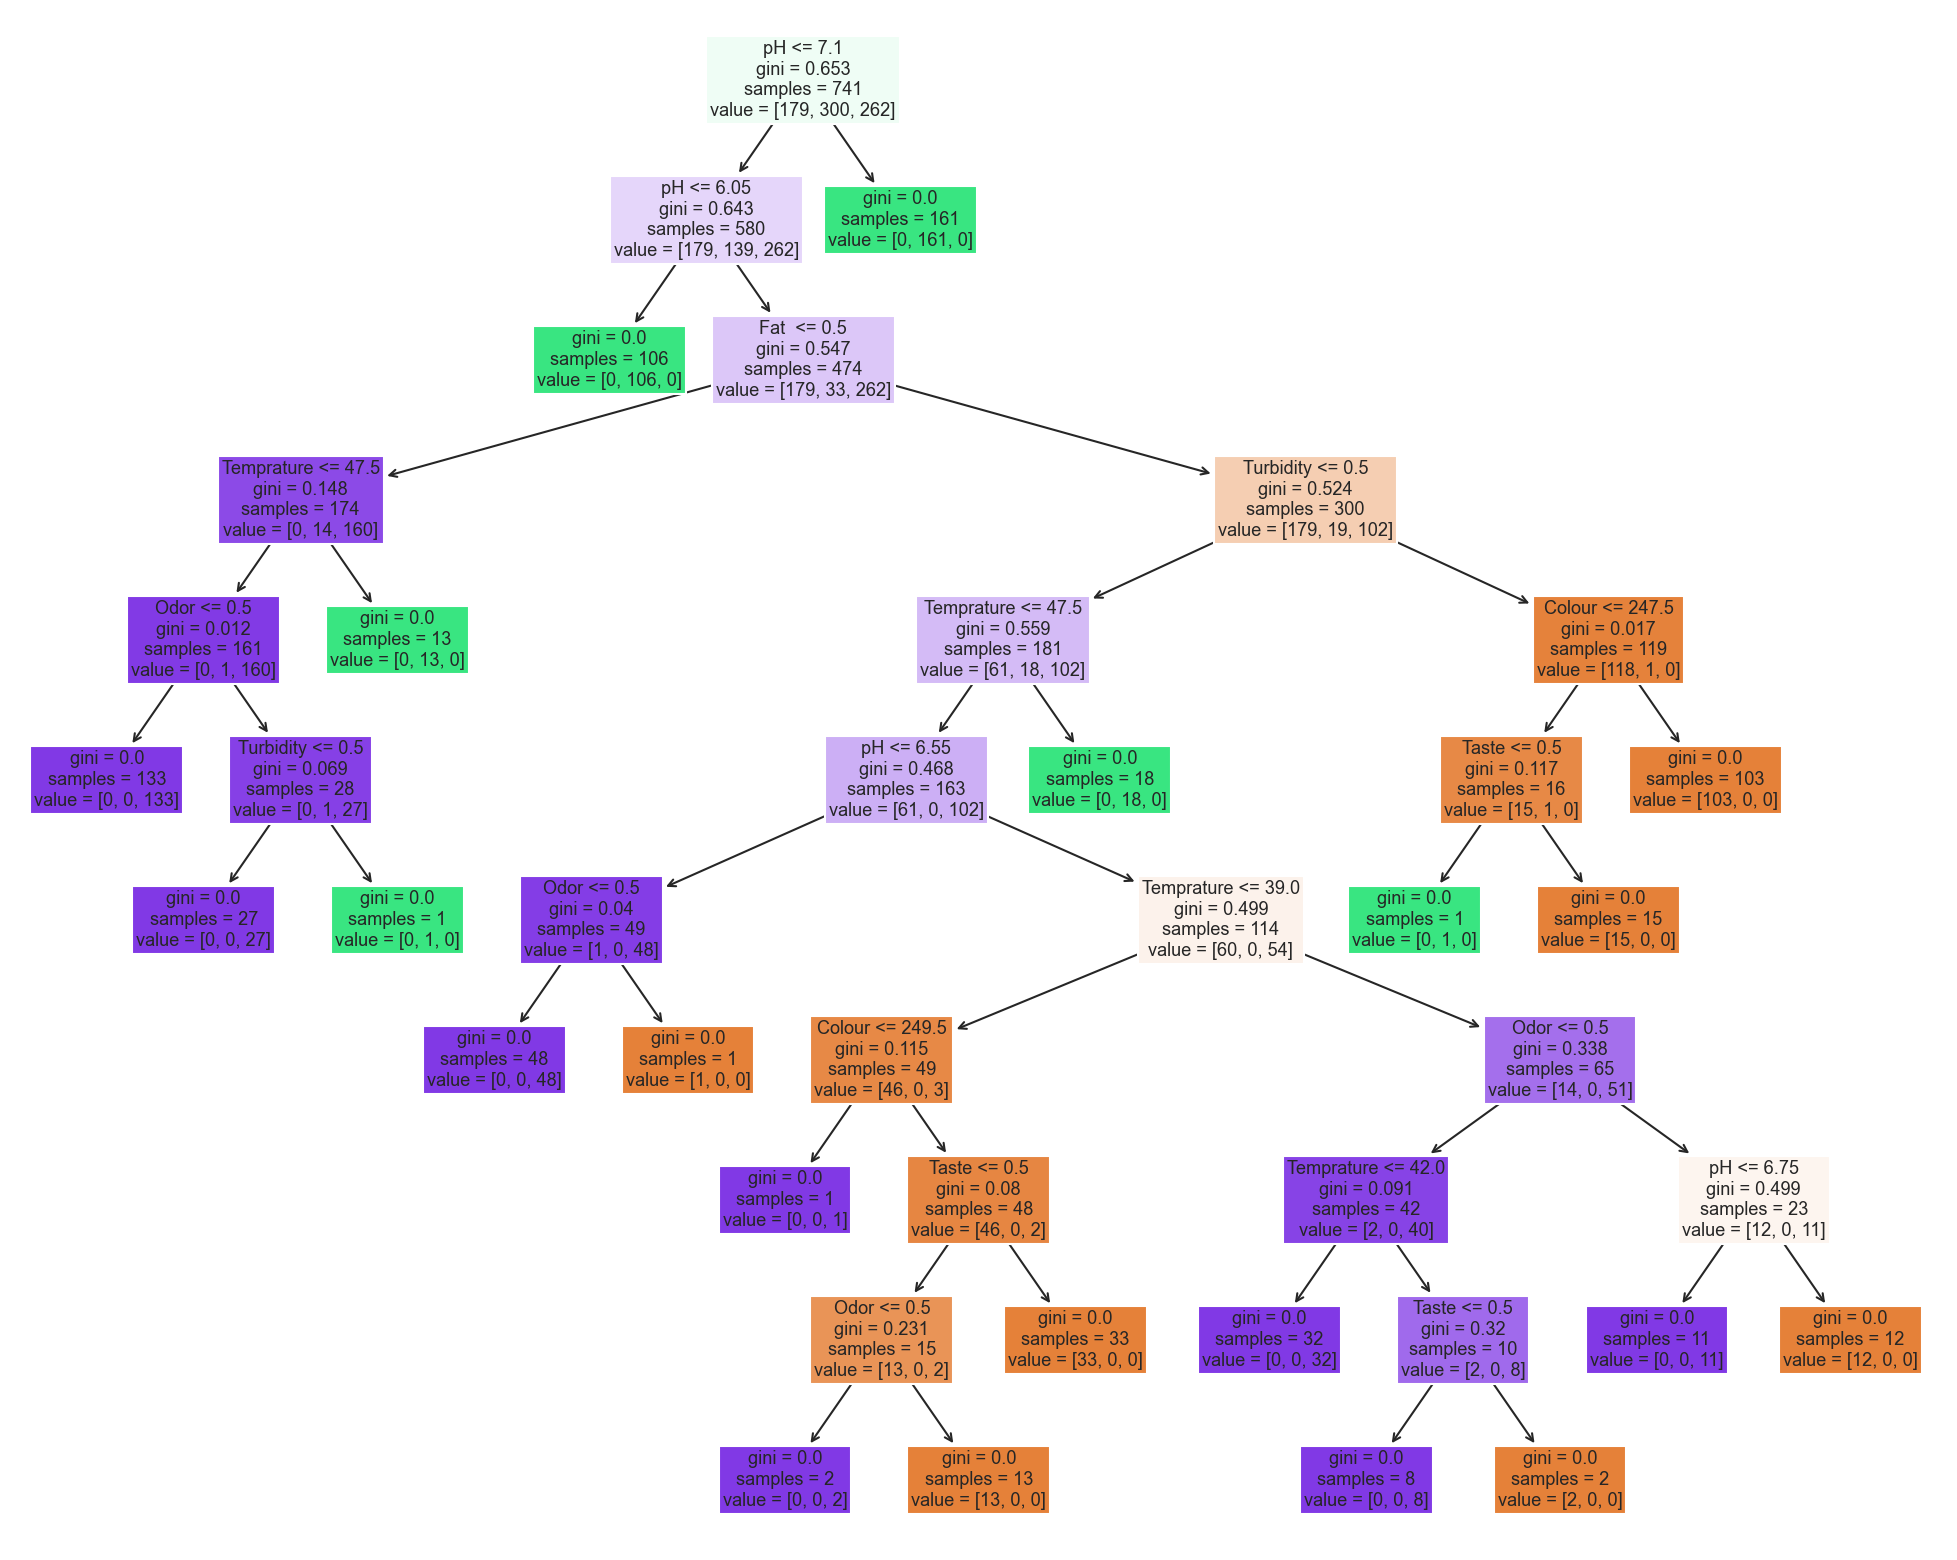

In [107]:
plot_decision_tree(model, feature_names)

## Findings and Conclusion

* Three classification models were used to predict the grades of the milk, and out of the three models, the decision tree model was the best model, with an accuracy score of 0.996.
* The K nearest model can also be used in classification as there is no significant difference in the performance matrices.
* We do not need to test other models as the accuracy, and the f1 score of the decision tree model are almost perfect (100% accuracy)